In [1]:
import numpy as np
import matplotlib.pyplot as plt

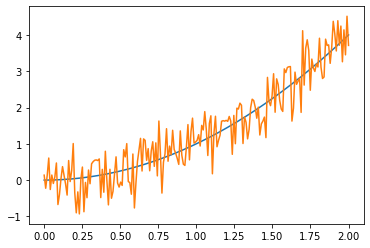

In [28]:
t = np.linspace(0, 2, 200)
# t.shape = (200, 0)

y = t**2
y_1 = y + np.random.normal(0, 0.5, y.shape)

plt.plot(t, y, t, y_1)

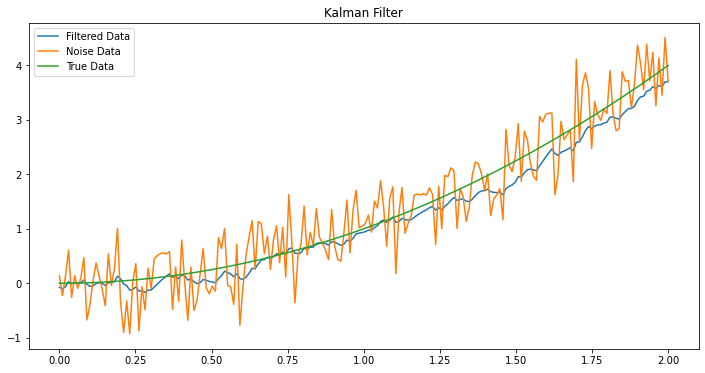

In [36]:
# X(k)=F*X(k-1)+Q
# Y(k)=H*X(k)+R

# x_minus(k) = F * x_plus(k-1)
# P_minus(k) = F**2 * P_plus(k-1) + sigma_Q
# K(k) = P_minus(k) * H / (H * P_minus(k) + sigma_R)
# x_plus(k) = x_minus(k) + K(k) * (y(k) - H * x_minus(k))
# P_plus(k) = (I - K(k) * H) * P_minus(k)

# model:
# x(k) = x(k-1) + Q ~ N(0, sigma_Q)
# y(k) = x(k-1) + R ~ N(0, sigma_R)

# 1. 1-dim signal
F = 1
H = 1

sigma_Q = 0.01
sigma_R = 1

# x_minus, x_plus, K, P_minus, P_plus

x0 = np.random.normal(0, 0.1 * 2)

x_plus = np.zeros(t.shape)
x_minus = np.zeros(t.shape)
K = np.zeros(t.shape) # 1 -> len(t)
P_minus = np.zeros(t.shape)
P_plus = np.zeros(t.shape)

y_1;

x_plus[0] = x0
x_minus[0] = x0
P_plus[0] = 0.1 * 2
P_minus[0] = 0.1 * 2

#
# relationship between mu and x
#

# x_minus(k) = F * x_plus(k-1)
# P_minus(k) = F**2 * P_plus(k-1) + sigma_Q
# K(k) = P_minus(k) * H / (H * P_minus(k) + sigma_R)
# x_plus(k) = x_minus(k) + K(k) * (y(k) - H * x_minus(k))
# P_plus(k) = (I - K(k) * H) * P_minus(k)

for k in range(1, len(t)):
    # prediction step
    x_minus[k] = F * x_plus[k-1]
    P_minus[k] = F**2 * P_plus[k-1] + sigma_Q

    # update step
    K[k] = P_minus[k] * H / (H * P_minus[k] + sigma_R)
    x_plus[k] = x_minus[k] + K[k] * (y_1[k] - H * x_minus[k])
    P_plus[k] = (1 - K[k] * H) * P_minus[k]

plt.figure(figsize=(12, 6))
plt.title('Kalman Filter')
plt.plot(t, x_plus, label='Filtered Data')
plt.plot(t, y_1, label='Noise Data')
plt.plot(t, y, label='True Data')
plt.legend()